## Assignment 3

Saumya Goel <br>
20BCE1574 <br>
VIT Chennai

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Load the dataset

In [2]:
df = pd.read_csv("Housing.csv")

In [3]:
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking furnishingstatus  
0              no             yes        2        furnished  
1              no             yes        3        furnished  
2              no              no        2   semi-furnished  
3              no             yes        3        furnished  
4              no             yes        2        furnished  


In [4]:
numeric_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
categorical_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'furnishingstatus']

### Visualizations

#### Univariate Analysis

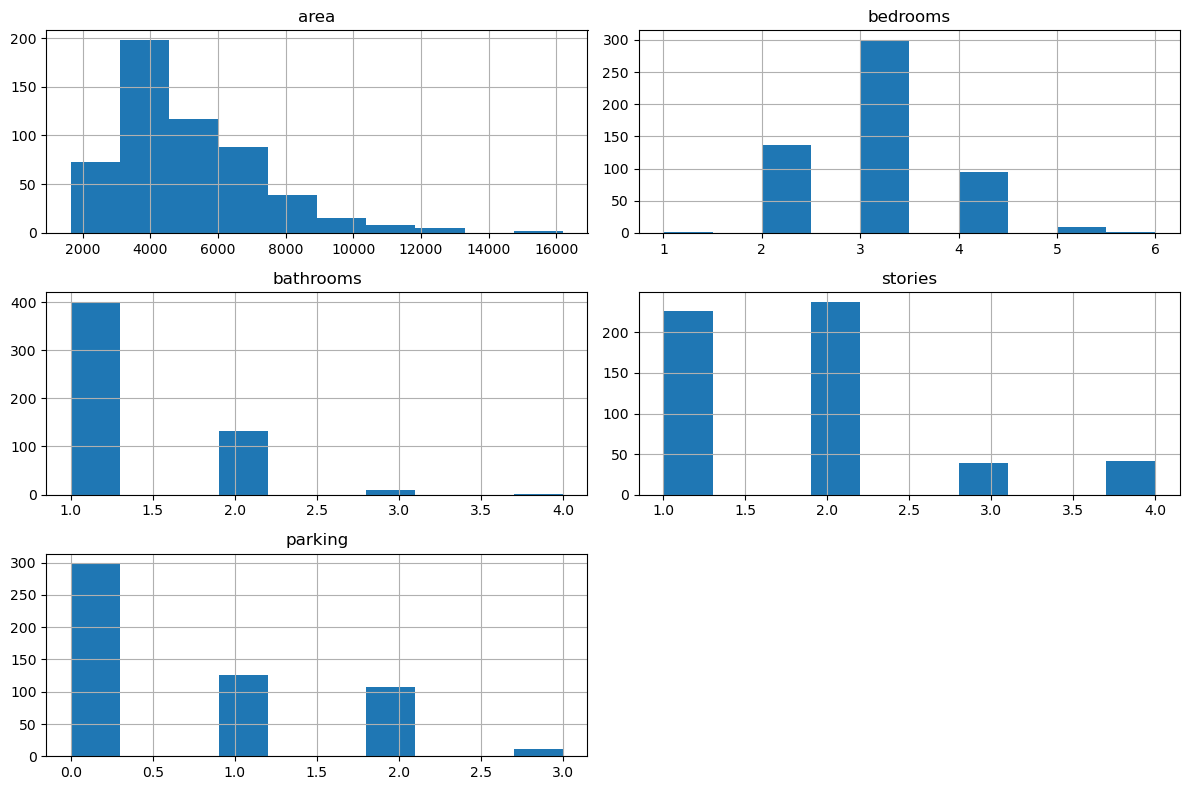

In [5]:
# Histogram for numerical variables
df[numeric_vars].hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

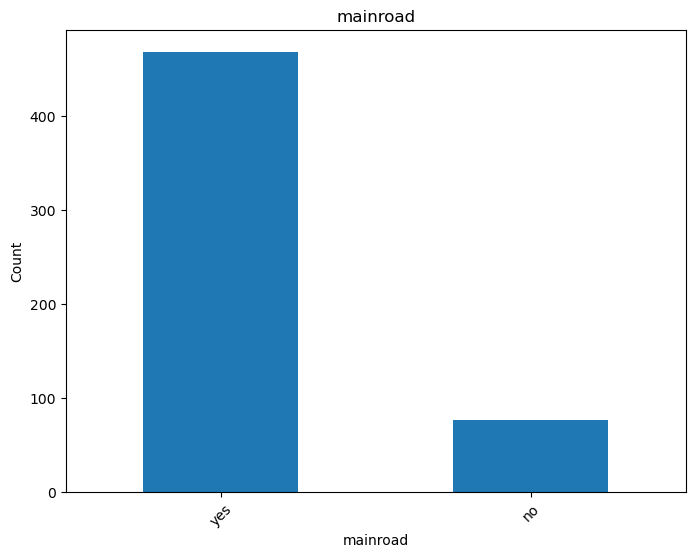

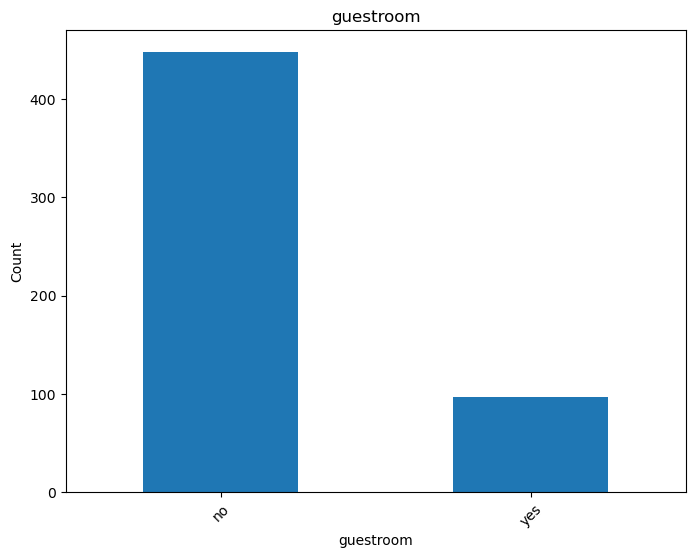

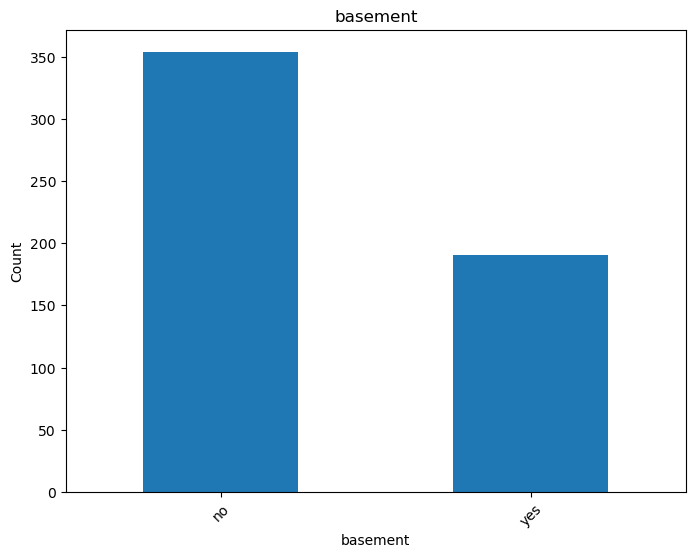

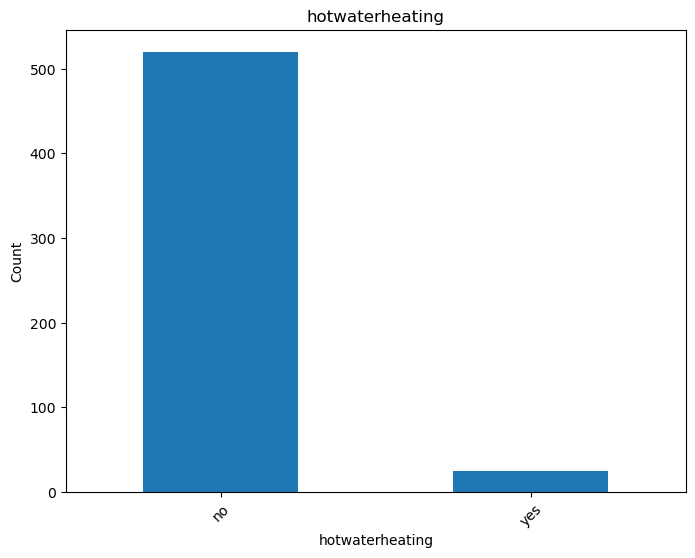

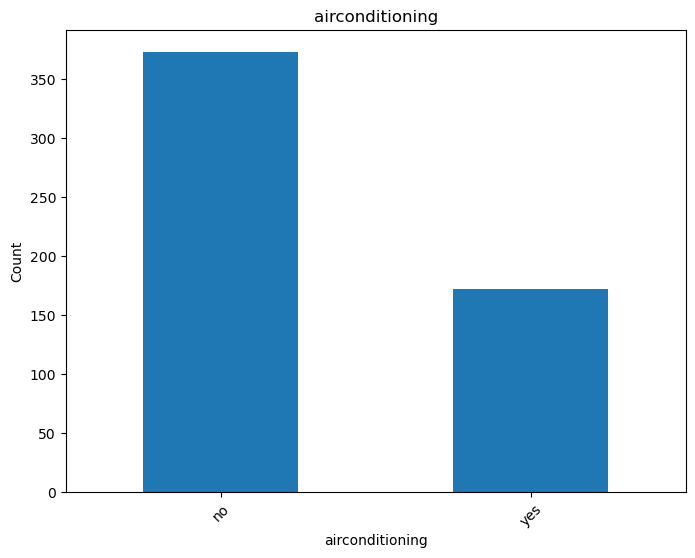

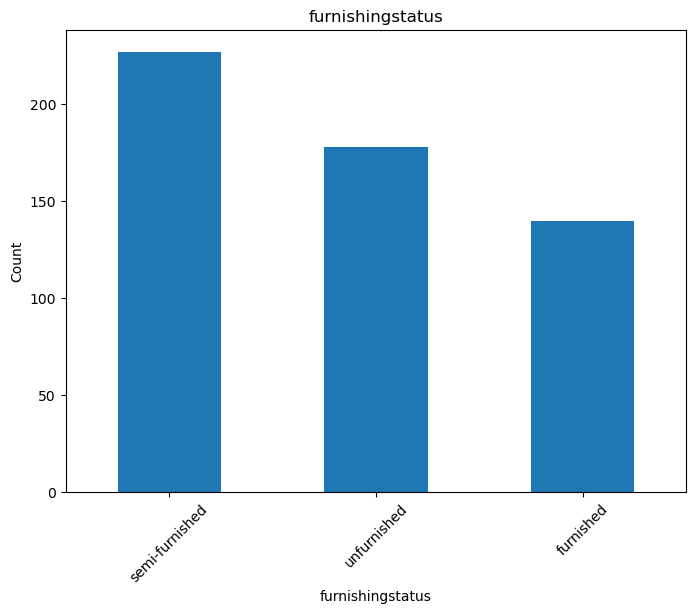

In [6]:
# Bar chart for categorical variables
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    df[var].value_counts().plot(kind='bar')
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

#### Bi-Variate Analysis

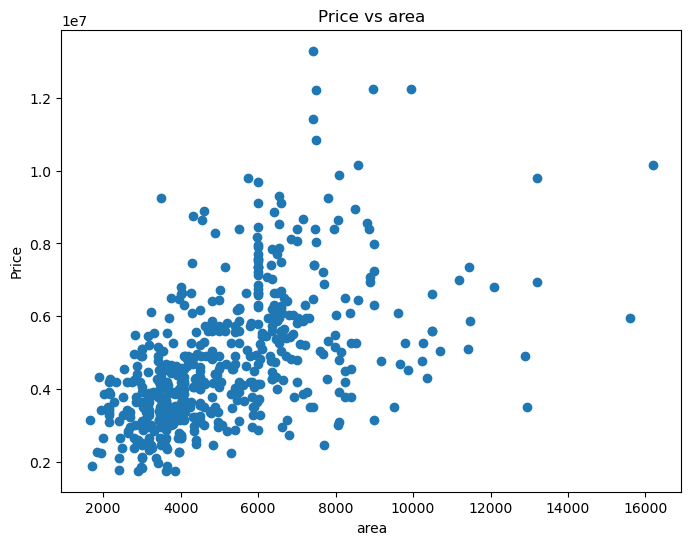

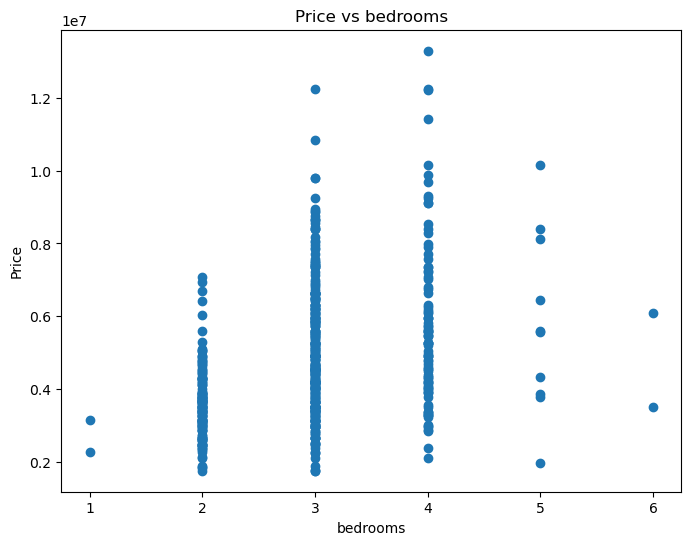

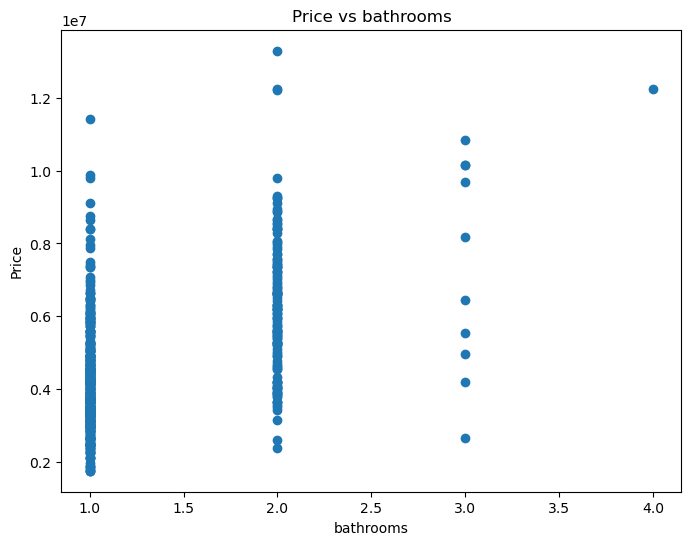

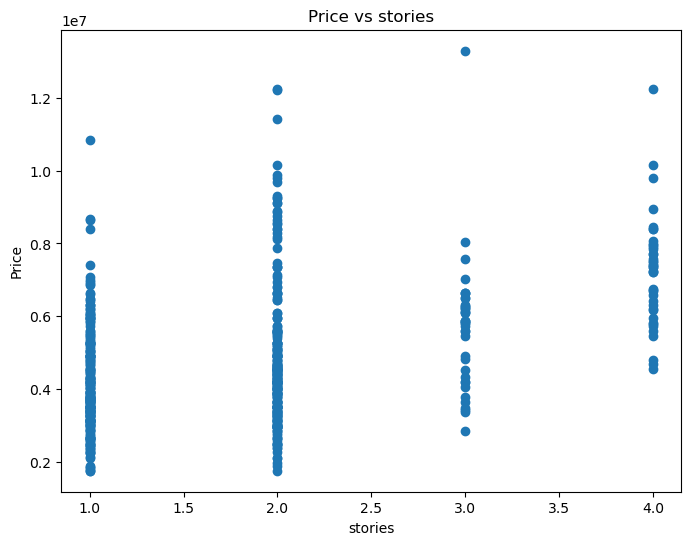

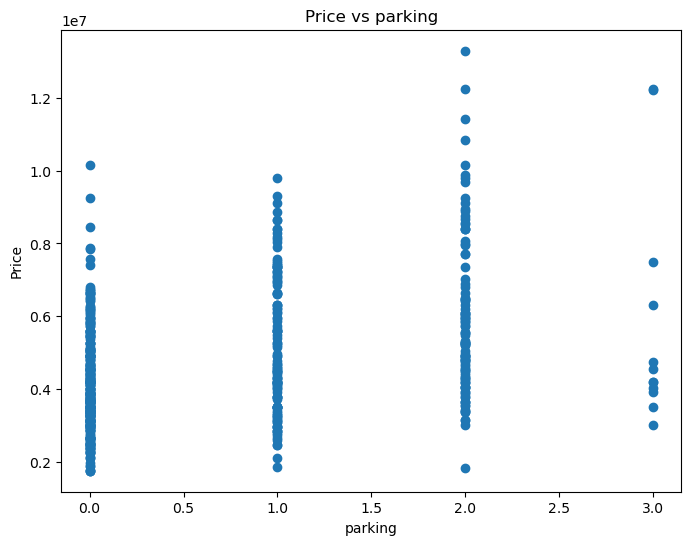

In [7]:
# Scatter plots
for var in numeric_vars:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[var], df['price'])
    plt.title('Price vs ' + var)
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.show()

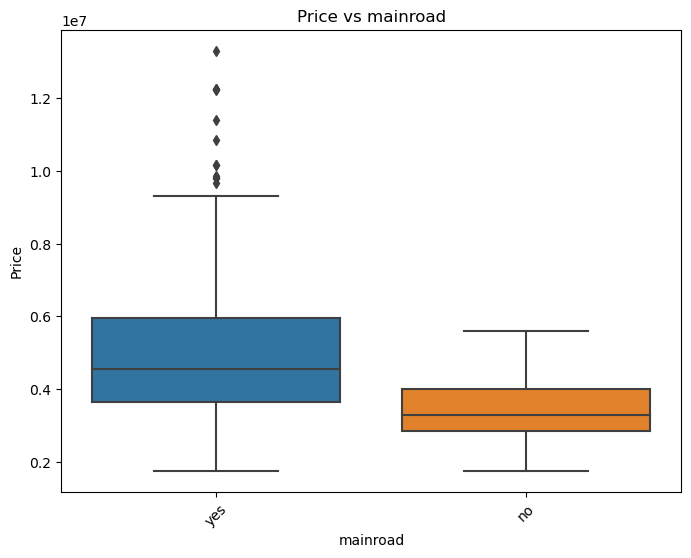

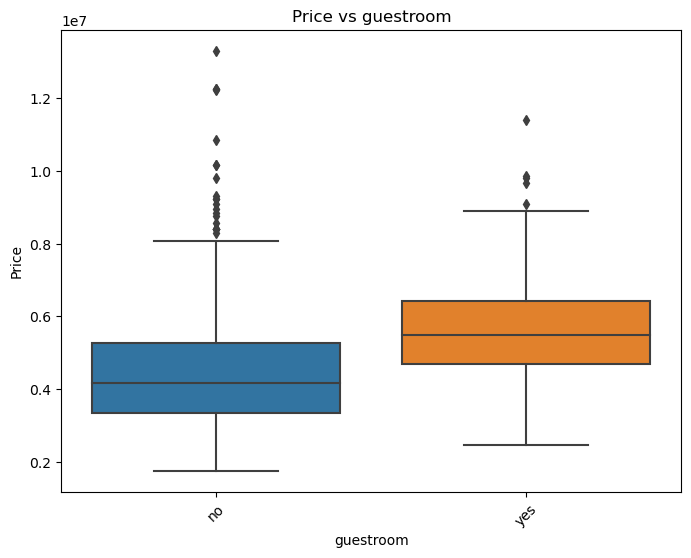

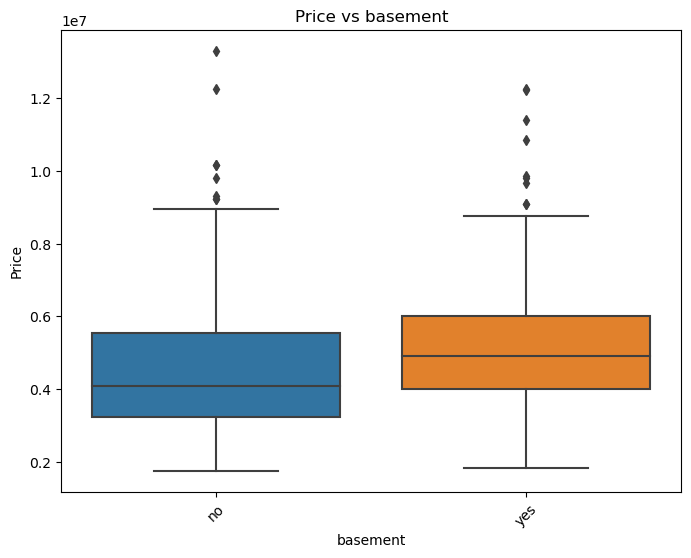

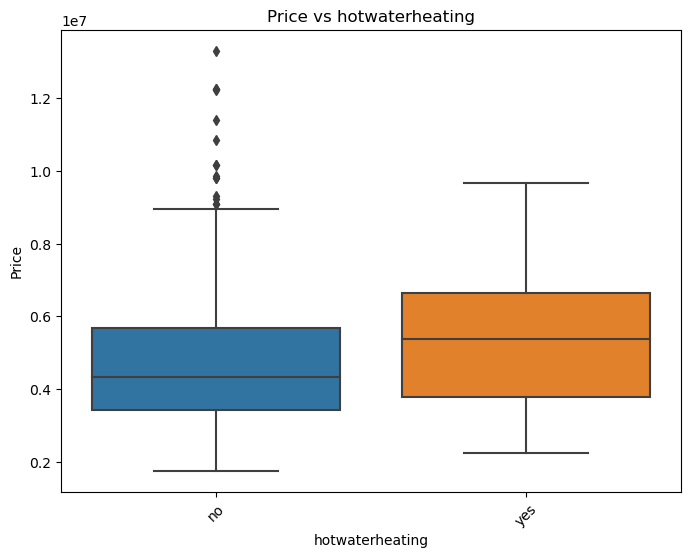

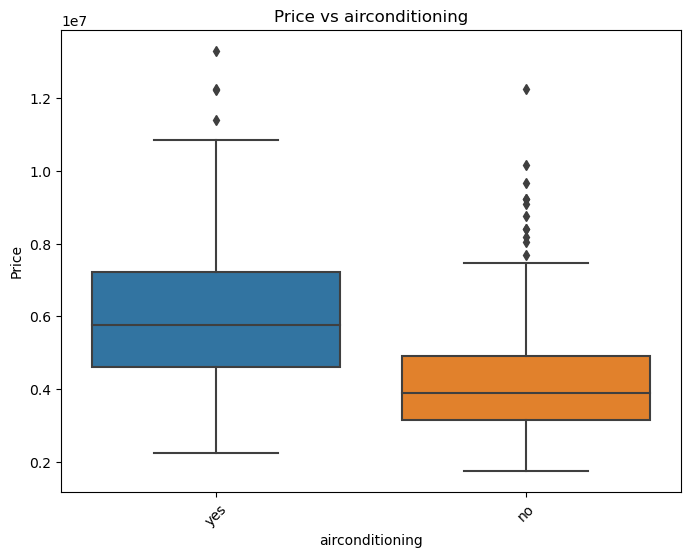

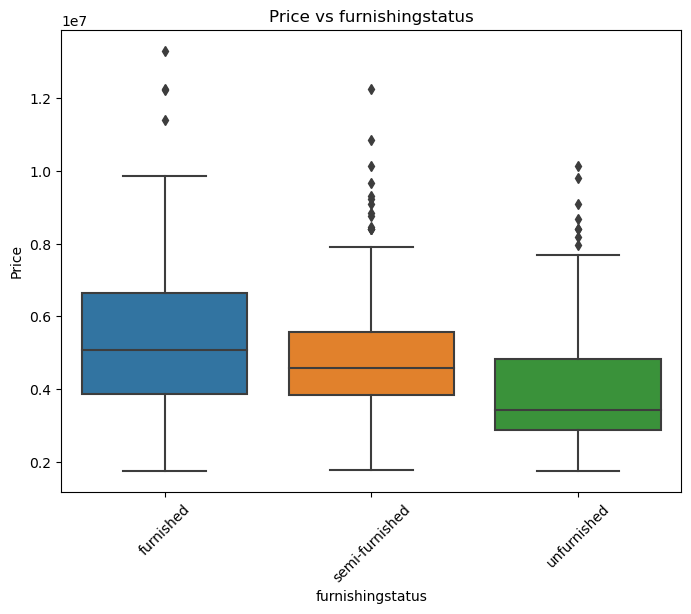

In [8]:
# Box plots
for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=var, y='price', data=df)
    plt.title('Price vs ' + var)
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()

#### Multi-Variate Analysis

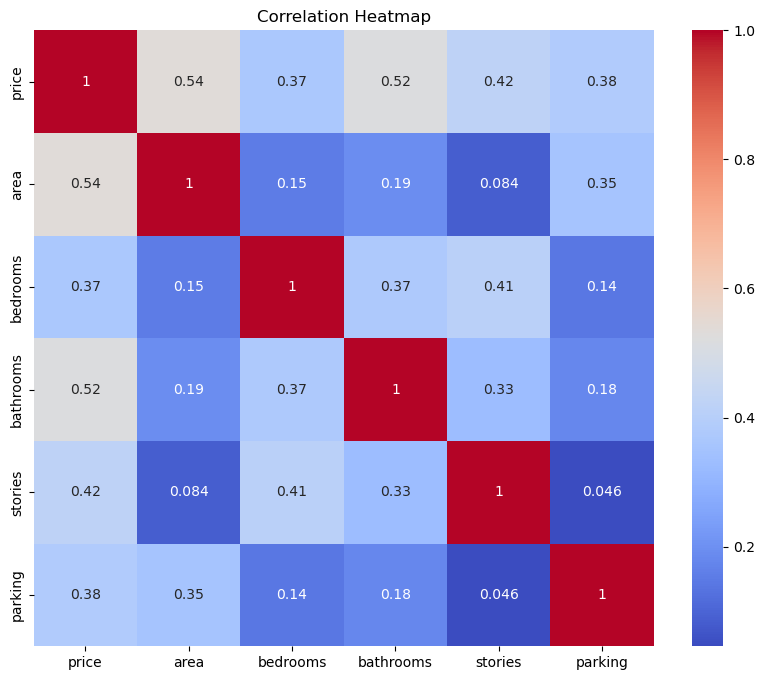

In [9]:
# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

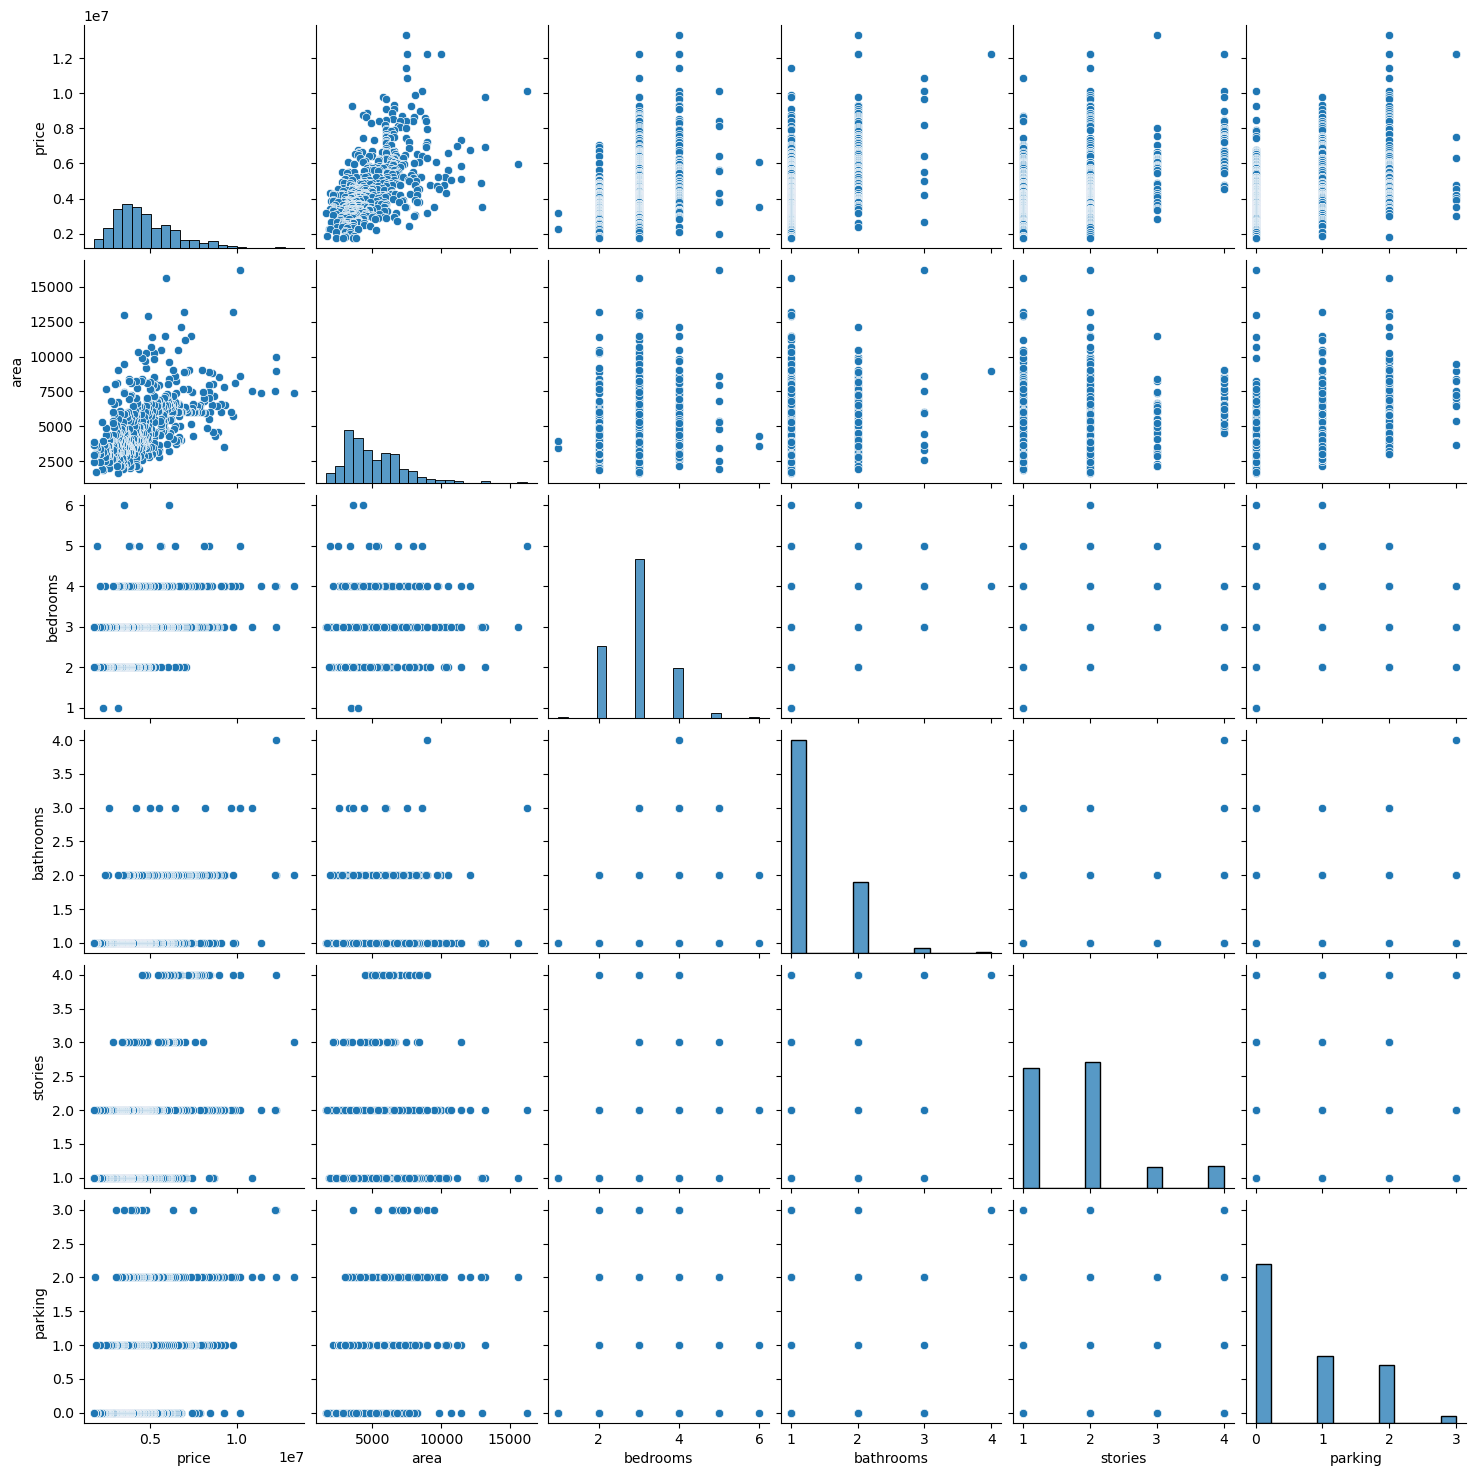

In [10]:
# Pair plot
sns.pairplot(df[['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
plt.show()

### Descriptive statistics

In [11]:
statistics = df.describe()
print(statistics)

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


### Handle the Missing values

In [12]:
missing_values_count = df.isnull().sum()
print("Missing Values Count", missing_values_count, sep="\n")

Missing Values Count
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


There are no missing values to be handled

### Find the outliers and replace them

In [13]:
z_scores = np.abs(stats.zscore(df[numeric_vars]))
threshold = 3

outlier_indices = np.where(z_scores > threshold)

for i, var in enumerate(numeric_vars):
    outlier_var_indices = outlier_indices[0][outlier_indices[1] == i]
    if len(outlier_var_indices) > 0:
        df.loc[outlier_var_indices, var] = df[var].median()

In [14]:
z_scores_after = stats.zscore(df[numeric_vars])
outlier_indices_after = np.where(np.abs(z_scores_after) > threshold)
print("Number of outliers removed:", len(outlier_indices[0]) - len(outlier_indices_after[0]))

Number of outliers removed: 16


### Check for Categorical columns and perform encoding

In [15]:
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')


In [16]:
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [17]:
print(df_encoded.head())

      price  area  bedrooms  bathrooms  stories  parking  mainroad_no  \
0  13300000  7420         4          2        3        2            0   
1  12250000  8960         4          1        4        3            0   
2  12250000  9960         3          2        2        2            0   
3  12215000  7500         4          2        2        3            0   
4  11410000  7420         4          1        2        2            0   

   mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes  \
0             1             1              0            1             0   
1             1             1              0            1             0   
2             1             1              0            0             1   
3             1             1              0            0             1   
4             1             0              1            0             1   

   hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0                   1                    0  

### Split the data into dependent and independent variables

In [18]:
X = df_encoded.drop('price', axis=1) # independant variables
y = df_encoded['price'] # dependant variable

In [19]:
print("Independent Variables (Features):")
print(X.head())

Independent Variables (Features):
   area  bedrooms  bathrooms  stories  parking  mainroad_no  mainroad_yes  \
0  7420         4          2        3        2            0             1   
1  8960         4          1        4        3            0             1   
2  9960         3          2        2        2            0             1   
3  7500         4          2        2        3            0             1   
4  7420         4          1        2        2            0             1   

   guestroom_no  guestroom_yes  basement_no  basement_yes  hotwaterheating_no  \
0             1              0            1             0                   1   
1             1              0            1             0                   1   
2             1              0            0             1                   1   
3             1              0            0             1                   1   
4             0              1            0             1                   1   

   hotwaterheati

In [20]:
print("Dependent Variable (Target):")
print(y.head())

Dependent Variable (Target):
0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


### Scale the independent variables

In [21]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())

       area  bedrooms  bathrooms   stories   parking  mainroad_no  \
0  1.237672  1.464768   1.760041  1.378217  1.517692    -0.405623   
1  2.036247  1.464768  -0.568169  2.532024  2.679409    -0.405623   
2  2.554802  0.064244   1.760041  0.224410  1.517692    -0.405623   
3  1.279156  1.464768   1.760041  0.224410  2.679409    -0.405623   
4  1.237672  1.464768  -0.568169  0.224410  1.517692    -0.405623   

   mainroad_yes  guestroom_no  guestroom_yes  basement_no  basement_yes  \
0      0.405623      0.465315      -0.465315     0.734539     -0.734539   
1      0.405623      0.465315      -0.465315     0.734539     -0.734539   
2      0.405623      0.465315      -0.465315    -1.361397      1.361397   
3      0.405623      0.465315      -0.465315    -1.361397      1.361397   
4      0.405623     -2.149083       2.149083    -1.361397      1.361397   

   hotwaterheating_no  hotwaterheating_yes  airconditioning_no  \
0            0.219265            -0.219265           -1.472618   
1 

### Split the data into training and testing

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Build the Model

In [23]:
model = LinearRegression()

### Train the Model

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_train_pred = model.predict(X_train)

In [26]:
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

### Test the Model

In [27]:
y_test_pred = model.predict(X_test)

In [28]:
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

### Performance Metrics

In [29]:
print("Training Set:")
print("Mean Squared Error:", mse_train)
print("R2 Score:", r2_train)
print("\n\nTesting Set:")
print("Mean Squared Error:", mse_test)
print("R2 Score:", r2_test)

Training Set:
Mean Squared Error: 1180875749437.3376
R2 Score: 0.6170206043272675


Testing Set:
Mean Squared Error: 2075124345811.8638
R2 Score: 0.5894558301358352
